In [1]:
import scaper
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import my_models
import librosa
import pandas as pd

sr = 24000




(1, 48000, 1)
['input', 'conv', 'conv_activation', 'conv_smoothing', 'conv_smoothing_activation', 'max_pooling', 'tf.compat.v1.transpose', 'tf.__operators__.getitem', 'conv2_layer_1', 'batch_layer_1', 'relu_1', 'conv2_layer_2', 'batch_layer_2', 'relu_2', 'Maxpool2D_1', 'conv2_layer_3', 'batch_layer_3', 'relu_3', 'Maxpool2D_2', 'conv2_layer_4', 'batch_layer_4', 'relu_4', 'Maxpool2D_3', 'conv2_layer_5', 'batch_layer_5', 'relu_5', 'Maxpool2D_4', 'conv2_layer_6', 'batch_layer_6', 'relu_6', 'Maxpool2D_5', 'conv2_layer_7', 'batch_layer_7', 'relu_7', 'conv2_layer_8', 'batch_layer_8', 'relu_8', 'Maxpool2D_6', 'conv2_layer_9', 'batch_layer_9', 'relu_9', 'Maxpool2D_7', 'GlobalAveragePooling', 'First_dense', 'Dense_layer']
45
max_pooling


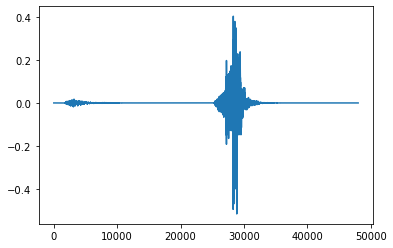

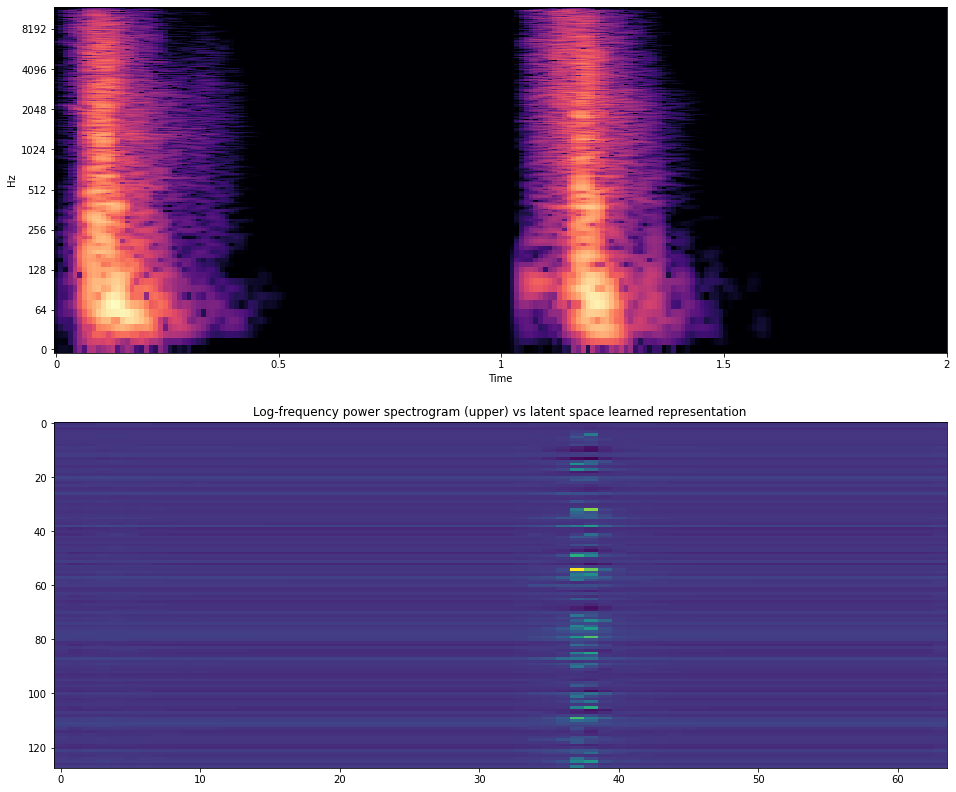

In [25]:
model = tf.keras.models.load_model('1d5epochs2classesscraper_new_metrics_binaryc_loss')
import librosa
import scipy

#path = '/Users/arvidfalch/repos/Vehicles/Air/Drones/Aircraft_Radio_Controlled_Drone_Start_Engines_Slow_Not_Lifting_Off_Then_Stop_Syma_X5SW_SND29303.wav'
#path = '/Users/arvidfalch/repos/arvidfalch/Dataset2/2019-03-20_rangetest/2019-03-20T13.34.02UTC_Vestby_R128-1-00002_Rangetest - preflight_from_0.13s_to_38.97s/gain_39dB/label_type_track_2.wav'
# drone
#path = '/Users/arvidfalch/repos/scaper_test/soundscapes/soundscape_unimodal4.wav'
# short drone
#path = '/Users/arvidfalch/repos/scaper_test/soundscapes/soundscape_unimodal7.wav'
# stab
path = '/Users/arvidfalch/Desktop/BLLTImpt_Bullets_Impact_Body_Thump_Soundly_SND6360.wav'

signal, _ = librosa.load(path, sr = sr, mono=True)

startpoint = 0
segment_size = 2*sr

test = signal[startpoint:startpoint+segment_size]
hann_window= scipy.signal.windows.hann(test.size)
test = test * hann_window
plt.plot(test)
test = test[...,tf.newaxis]
test = test[tf.newaxis, ...]
print(test.shape)

layer_outputs = [layer.output for layer in model.layers[:]]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(test)
  
layer_names = []
  
for layer in model.layers[:]:
  layer_names.append(layer.name)
print(layer_names)
print(len(layer_names))
print(layer_names[5])
cont = activations[5]
cont = tf.squeeze(cont)
cont = tf.transpose(cont, [1, 0])

import librosa.display
x = signal[startpoint:startpoint+segment_size]
hop_length = 256
fig, ax = plt.subplots(figsize= (16,14), nrows=2, ncols=1, sharex=False)


D = librosa.amplitude_to_db(np.abs(librosa.stft(x, hop_length=hop_length)),

                            ref=np.max)

librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,

                         x_axis='time', ax=ax[0])


ax[0] = plt.imshow(cont, cmap ='viridis', interpolation='none', aspect='auto') 

ax[1].set(title='Log-frequency power spectrogram (upper) vs latent space learned representation')

ax[1].label_outer()

batch_layer_8


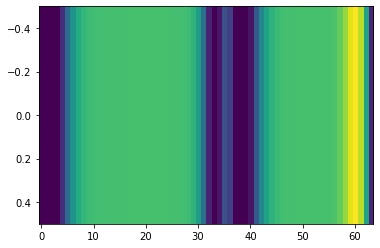

In [26]:
layeridx = 41
print(layer_names[35])
plt.imshow(activations[layeridx][0,:,:,5], cmap='viridis', aspect='auto')



relu_1


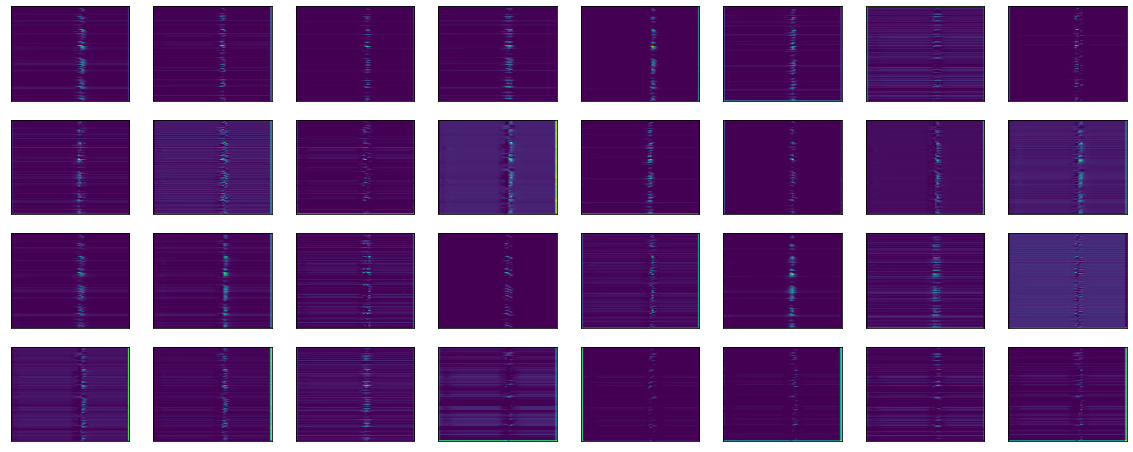

In [27]:

layeridx = 10

print(layer_names[layeridx])

fig, axes = plt.subplots(4,8, subplot_kw={'xticks':(), 'yticks':()}, figsize=(20,8))
for i, ax in zip(range(32), axes.ravel()):
    
    ax.imshow(activations[layeridx][0, :, :, i], cmap ='viridis', aspect='auto')
    #ax.invert_yaxis()

Maxpool2D_7


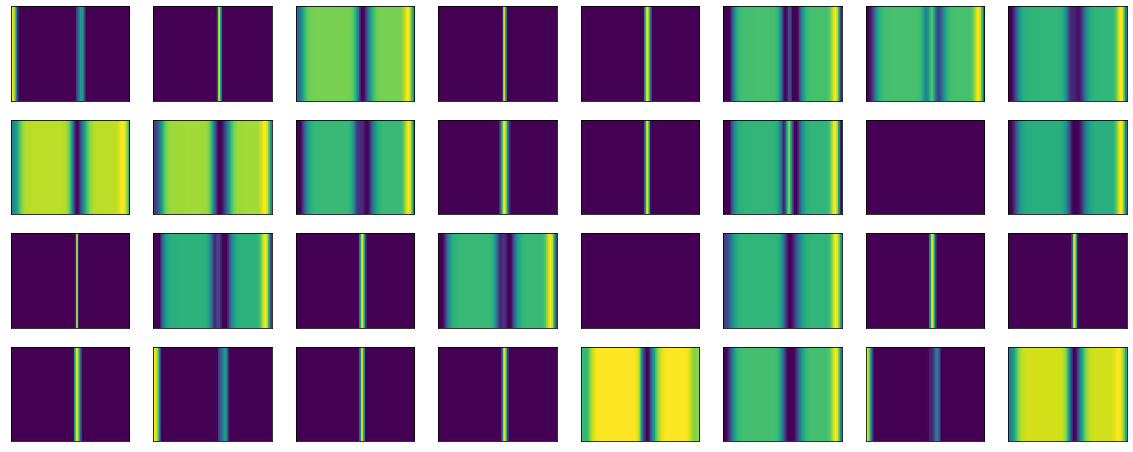

In [28]:

layeridx = 41

print(layer_names[layeridx])

fig, axes = plt.subplots(4,8, subplot_kw={'xticks':(), 'yticks':()}, figsize=(20,8))
for i, ax in zip(range(32), axes.ravel()):
    
    ax.imshow(activations[layeridx][0, :, :, i], cmap ='viridis', aspect='auto')
    #ax.invert_yaxis()

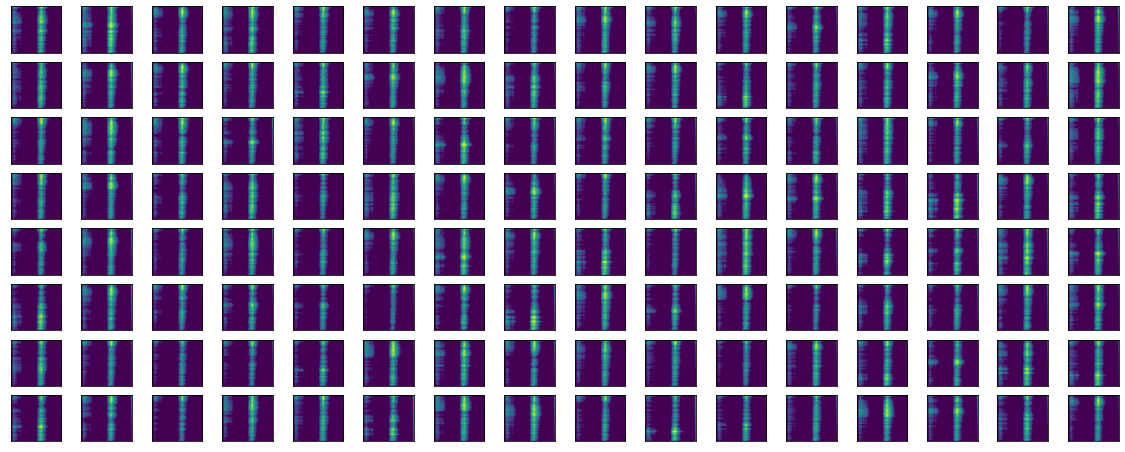

In [29]:
def fft_of_filters_in_layer(activations, layer_n, filter_n):
    x = activations[layer_n][-1]
    y = tf.transpose(x, [1,0])
    y = y.numpy()
    mel = librosa.feature.melspectrogram(y=y[filter_n], n_fft=2048, hop_length=345, n_mels=128)
    mel = librosa.power_to_db(mel)
    #librosa.display.specshow(mel)
    return mel

#fft_of_filters_in_layer(activations, 2, 125)

fig, axes = plt.subplots(8,16, subplot_kw={'xticks':(), 'yticks':()}, figsize=(20,8))
for i, ax in zip(range(128), axes.ravel()):
    mel = fft_of_filters_in_layer(activations, 1, i)
    ax.imshow(mel)

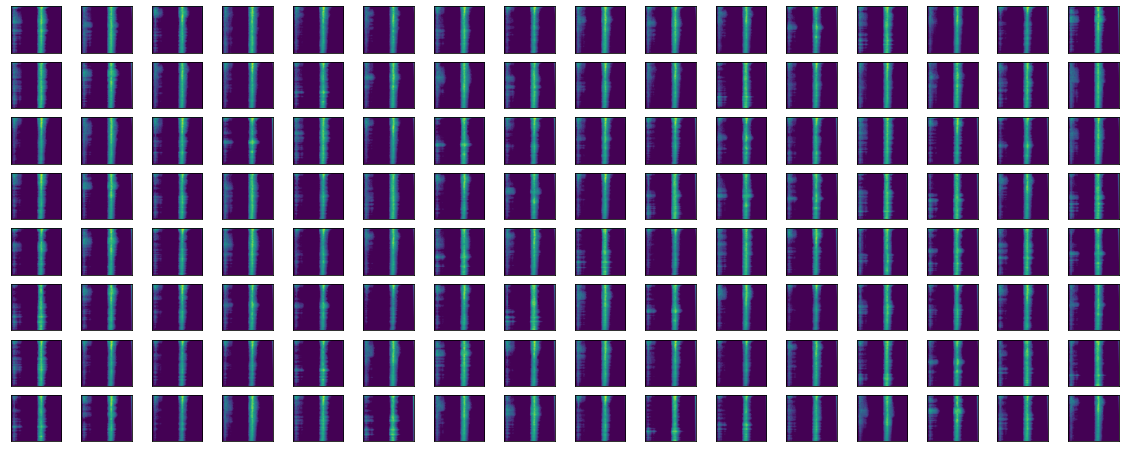

In [30]:
fig, axes = plt.subplots(8,16, subplot_kw={'xticks':(), 'yticks':()}, figsize=(20,8))
for i, ax in zip(range(128), axes.ravel()):
    mel = fft_of_filters_in_layer(activations, 2, i)
    ax.imshow(mel)

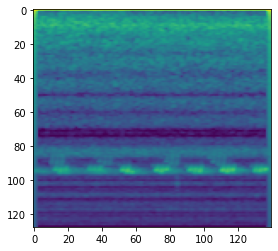

In [40]:
mel = fft_of_filters_in_layer(activations, 2, 122)
plt.imshow(mel)